# Reinforcement learning

In [3]:
#import keras
import numpy as np
import matplotlib.pyplot as plt
import tqdm
from tqdm import tqdm_notebook
%matplotlib inline

## Let us define a simple game


[[  -1e+00   -1e+03   -1e+03   -1e+03    0e+00]
 [  -1e+03   -1e+03   -1e+03   -1e+00    0e+00]
 [  -1e+00   -1e+00   -1e+00   -1e+00    0e+00]
 [  -1e+00   -1e+03   -1e+00   -1e+03    0e+00]
 [  -1e+03   -1e+00   -1e+03   -1e+00    0e+00]
 [  -1e+00   -1e+03   -1e+00   -1e+00    0e+00]
 [  -1e+00   -1e+00   -1e+00   -1e+03    0e+00]
 [   0e+00   -1e-01   -1e+03    0e+00    3e+04]
 [  -1e+04   -9e+03   -9e+03   -1e+04   -1e+04]]


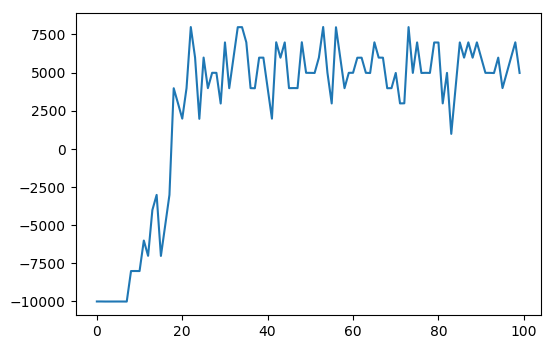

In [249]:
# http://outlace.com/Reinforcement-Learning-Part-1/
#There is a series of connected paths that lead to a Goal (G). Player begins in
#State cero (S). Four actions are available: up, down, left, right, and stay.
#There are two paths to the goal
np.set_printoptions(precision=0)
N=-10000
W=10000
#      G
#     |
#   0-0-0
#   |  |
# 0-0-0
#  |
#  S
R=np.array([
            [-1,N,N,N,0],
            [N,N,N,-1,0],
            [-1,-1,-1,-1,0],
            [-1,N,-1,N,0],
            [N,-1,N,-1,0],
            [-1,N,-1,-1,0],
            [-1,-1,-1,N,0],
            [N,-1,N,N,W],
            [N,N,N,N,N]],dtype=np.float32)

Q=np.zeros_like(R,dtype=np.float32)
T=np.array([
            [2,8,8,8,0],
            [8,8,8,2,1],
            [4,0,1,3,2],
            [6,8,2,8,3],
            [8,2,8,5,4],
            [7,8,4,6,5],
            [8,2,5,8,6],
            [8,5,8,8,7],
            [8,8,8,8,8]])
def get_next_state(state,action):
    return T[state,action]
def softmax(a,T):
    return np.exp((a-np.max(a))/T)/np.exp((a-np.max(a))/T).sum()
def temperature(i):
    return 100*np.exp(-1*i)+100
def act(state,i):    
    return np.random.choice(5,p=softmax(Q[state,:],temperature(i)))
def update_Q(state,action,next_state):
    Q[state,action]+=alpha*(R[state,action]+gamma*np.max(Q[state,:])-Q[state,action])
def play(n=10):
    reward=0.
    for l in range(n):
        state2=0
        for k in range(its): 
            ac=act(state2,temperature(i))
            reward+=R[state2,ac]
            state2=get_next_state(state2,ac)
            if((state2==7 and ac==4)  or (state2==8)):break
    return reward/n
gamma=0.8
alpha=0.1
episode_n=100
its=9999
Q_update=0
plays=[]
for i in tqdm_notebook(range(episode_n)):
    state=0
    for j in range(its):
        action=act(state,temperature(i))        
        next_state=get_next_state(state,action)        
        update_Q(state,action,next_state)
        if((state==7 and action==4)  or (state==8)):break
        state=next_state        
    plays.append(play())
    
print(Q)
plt.plot(plays)    

## Let's try now a neural net to act as the Q table